In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv("./Advertising.csv")

In [4]:
x = data.drop(['sales', 'Unnamed: 0'], axis=1)
y = data['sales']
x

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [5]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [6]:
model = LinearRegression().fit(x, y)
print(model.coef_)
print(model.intercept_)
r2 = model.score(x, y)

[ 0.04576465  0.18853002 -0.00103749]
2.938889369459412


1. What is the loss function used in LinearRegression by default? What are other choices?
  - mean squared error (MSE)
  - https://scikit-learn.org/stable/modules/linear_model.html
  - https://medium.com/analytics-vidhya/sklearn-linear-regression-under-the-hood-31ee71aec00#:~:text=The%20algorithm%20minimizes%20a%20loss,Mean%20Squared%20Error(RMSE).

2. What is the optimization method used in Linear Regression by default?
- least squares optimization


3. Find the analytical solution (solve by hand or use numpy (?)) of the coefficents of the multiple linear regression and compare with the results from LinearRegression. 

In [25]:
data = np.c_[x]
XX = np.c_[data, np.ones(200)]

In [20]:
XX

array([[230.1,  37.8,  69.2,   1. ],
       [ 44.5,  39.3,  45.1,   1. ],
       [ 17.2,  45.9,  69.3,   1. ],
       [151.5,  41.3,  58.5,   1. ],
       [180.8,  10.8,  58.4,   1. ],
       [  8.7,  48.9,  75. ,   1. ],
       [ 57.5,  32.8,  23.5,   1. ],
       [120.2,  19.6,  11.6,   1. ],
       [  8.6,   2.1,   1. ,   1. ],
       [199.8,   2.6,  21.2,   1. ],
       [ 66.1,   5.8,  24.2,   1. ],
       [214.7,  24. ,   4. ,   1. ],
       [ 23.8,  35.1,  65.9,   1. ],
       [ 97.5,   7.6,   7.2,   1. ],
       [204.1,  32.9,  46. ,   1. ],
       [195.4,  47.7,  52.9,   1. ],
       [ 67.8,  36.6, 114. ,   1. ],
       [281.4,  39.6,  55.8,   1. ],
       [ 69.2,  20.5,  18.3,   1. ],
       [147.3,  23.9,  19.1,   1. ],
       [218.4,  27.7,  53.4,   1. ],
       [237.4,   5.1,  23.5,   1. ],
       [ 13.2,  15.9,  49.6,   1. ],
       [228.3,  16.9,  26.2,   1. ],
       [ 62.3,  12.6,  18.3,   1. ],
       [262.9,   3.5,  19.5,   1. ],
       [142.9,  29.3,  12.6,   1. ],
 

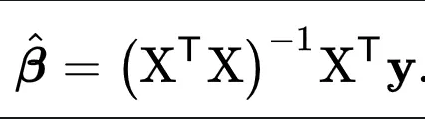

In [21]:
theta = np.linalg.inv(XX.T @ XX) @ (XX.T @ y)
theta

array([ 4.57646455e-02,  1.88530017e-01, -1.03749304e-03,  2.93888937e+00])

In [22]:
print(model.coef_)
print(model.intercept_)

[ 0.04576465  0.18853002 -0.00103749]
2.938889369459412


SAME NUMBERS !

## 3D PLOT 

In [24]:
from mpl_toolkits.mplot3d import Axes3D as ax

In [26]:
x = data[:, 0]
y = data[:, 1]
z = data[:, 2]

x

array([230.1,  44.5,  17.2, 151.5, 180.8,   8.7,  57.5, 120.2,   8.6,
       199.8,  66.1, 214.7,  23.8,  97.5, 204.1, 195.4,  67.8, 281.4,
        69.2, 147.3, 218.4, 237.4,  13.2, 228.3,  62.3, 262.9, 142.9,
       240.1, 248.8,  70.6, 292.9, 112.9,  97.2, 265.6,  95.7, 290.7,
       266.9,  74.7,  43.1, 228. , 202.5, 177. , 293.6, 206.9,  25.1,
       175.1,  89.7, 239.9, 227.2,  66.9, 199.8, 100.4, 216.4, 182.6,
       262.7, 198.9,   7.3, 136.2, 210.8, 210.7,  53.5, 261.3, 239.3,
       102.7, 131.1,  69. ,  31.5, 139.3, 237.4, 216.8, 199.1, 109.8,
        26.8, 129.4, 213.4,  16.9,  27.5, 120.5,   5.4, 116. ,  76.4,
       239.8,  75.3,  68.4, 213.5, 193.2,  76.3, 110.7,  88.3, 109.8,
       134.3,  28.6, 217.7, 250.9, 107.4, 163.3, 197.6, 184.9, 289.7,
       135.2, 222.4, 296.4, 280.2, 187.9, 238.2, 137.9,  25. ,  90.4,
        13.1, 255.4, 225.8, 241.7, 175.7, 209.6,  78.2,  75.1, 139.2,
        76.4, 125.7,  19.4, 141.3,  18.8, 224. , 123.1, 229.5,  87.2,
         7.8,  80.2,